# Package loading and basic configurations

In [1]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd

from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

# Querying enviroCar Tracks

The following cell queries tracks from the enviroCar API. It defines a bbox for the area of Münster (Germany) and requests 50 tracks. The result is a GeoDataFrame, which is a geo-extended Pandas dataframe from the GeoPandas library. It contains all information of the track in a flat dataframe format including a specific geometry column. 

In [2]:
track_df = track_api.get_tracks(num_results=50) # requesting 50 tracks inside the bbox
track_df

,id,time,geometry,Consumption.value,Consumption.unit,Intake Pressure.value,Intake Pressure.unit,GPS Altitude.value,GPS Altitude.unit,Engine Load.value,...,GPS VDOP.value,GPS VDOP.unit,GPS HDOP.value,GPS HDOP.unit,MAF.value,MAF.unit,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,O2 Lambda Voltage.value,O2 Lambda Voltage.unit
0,5e8ea6ff65b80c5d6bd4d7d7,2020-04-08T10:26:02,POINT (7.77562 51.66562),1.842269,l/h,40.999999,kPa,101.479695,m,35.979184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5e8ea6ff65b80c5d6bd4d7d9,2020-04-08T10:26:07,POINT (7.77666 51.66562),2.808972,l/h,59.000001,kPa,103.439300,m,52.609092,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5e8ea6ff65b80c5d6bd4d7da,2020-04-08T10:26:13,POINT (7.77775 51.66563),1.737315,l/h,37.000001,kPa,102.729004,m,31.372550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5e8ea6ff65b80c5d6bd4d7db,2020-04-08T10:26:18,POINT (7.77881 51.66564),1.708456,l/h,37.000000,kPa,102.824218,m,31.996800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5e8ea6ff65b80c5d6bd4d7dc,2020-04-08T10:26:23,POINT (7.77985 51.66564),1.730519,l/h,38.000000,kPa,102.669197,m,32.080061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,5e73890665b80c5d6bcd8d18,2020-03-19T10:06:10,POINT (7.83251 51.66579),0.719324,l/h,21.000000,kPa,109.847215,m,16.209151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,5e73890665b80c5d6bcd8d19,2020-03-19T10:06:15,POINT (7.83284 51.66555),4.688310,l/h,87.852694,kPa,110.625243,m,85.015826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,5e73890665b80c5d6bcd8d1a,2020-03-19T10:06:20,POINT (7.83312 51.66506),0.996500,l/h,23.236741,kPa,111.924905,m,17.665299,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,5e73890665b80c5d6bcd8d1b,2020-03-19T10:06:25,POINT (7.83335 51.66461),1.445306,l/h,35.000000,kPa,113.149255,m,30.196079,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
track_df.plot(figsize=(8, 10))

# Inspecting a single Track

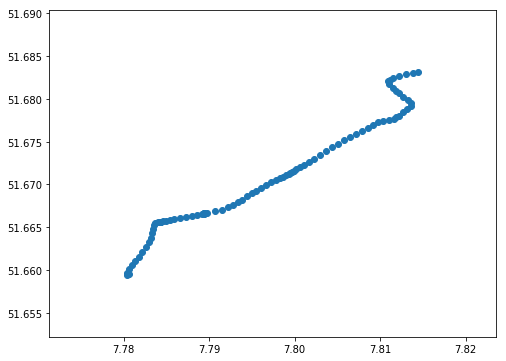

In [4]:
some_track_id = track_df['track.id'].unique()[1]
some_track = track_df[track_df['track.id'] == some_track_id]
some_track.plot(figsize=(8,10))

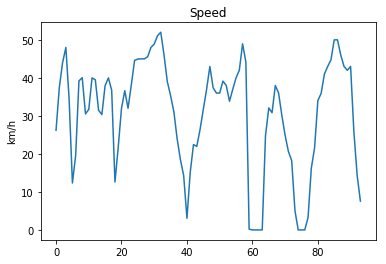

In [5]:
ax = some_track['Speed.value'].plot()
ax.set_title("Speed")
ax.set_ylabel(some_track['Speed.unit'][0])
ax

## Interactive Map
The following map-based visualization makes use of folium. It allows to visualizate geospatial data based on an interactive leaflet map. Since the data in the GeoDataframe is modelled as a set of Point instead of a LineString, we have to manually create a polyline

In [6]:
import folium

lats = list(some_track['geometry'].apply(lambda coord: coord.y))
lngs = list(some_track['geometry'].apply(lambda coord: coord.x))

avg_lat = sum(lats) / len(lats)
avg_lngs = sum(lngs) / len(lngs)

m = folium.Map(location=[avg_lat, avg_lngs], zoom_start=13)
folium.PolyLine([coords for coords in zip(lats, lngs)], color='blue').add_to(m)
m

# Example: Visualization with pydeck (deck.gl)

The pydeck library makes use of the basemap tiles from Mapbox. In case you want to visualize the map with basemap tiles, you need to register with MapBox, and configure a specific access token. The service is free until a certain level of traffic is esceeded.

You can either configure it via your terminal (i.e. `export MAPBOX_API_KEY=<mapbox-key-here>`), which pydeck will automatically read, or you can pass it as a variable to the generation of pydeck (i.e. `pdk.Deck(mapbox_key=<mapbox-key-here>, ...)`.

In [7]:
import pydeck as pdk

# for pydeck the attributes have to be flat
track_df['lat'] = track_df['geometry'].apply(lambda coord: coord.y)
track_df['lng'] = track_df['geometry'].apply(lambda coord: coord.x)
vis_df = pd.DataFrame(track_df)
vis_df['speed'] = vis_df['Speed.value']

# omit unit columns
vis_df_cols = [col for col in vis_df.columns if col.lower()[len(col)-4:len(col)] != 'unit']
vis_df = vis_df[vis_df_cols]

layer = pdk.Layer(
    'ScatterplotLayer',
    data=vis_df,
    get_position='[lng, lat]',
    auto_highlight=True,
    get_radius=10,          # Radius is given in meters
    get_fill_color='[speed < 20 ? 0 : (speed - 20)*8.5, speed < 50 ? 255 : 255 - (speed-50)*8.5, 0, 140]',  # Set an RGBA value for fill
    pickable=True
)

# Set the viewport location
view_state = pdk.ViewState(
    longitude=7.5963592529296875,
    latitude=51.96246168188569,
    zoom=10,
    min_zoom=5,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)

r = pdk.Deck(
    width=200, 
    layers=[layer], 
    initial_view_state=view_state #, mapbox_key=<mapbox-key-here>
)
r.to_html('tracks_muenster.html', iframe_width=900)

C:\Users\visweshwar\Anaconda3\lib\site-packages\pydeck\bindings\deck.py:83: UserWarning: Mapbox API key is not set. This may impact available features of pydeck.
  UserWarning,


'C:\\Users\\visweshwar\\envirocar-py-master\\examples\\tracks_muenster.html'

Summary statistics of the single track is created in the below code displaying the count, mean etc, using the describe() from pandas. And after that the plot for the consumption value is created.

In [8]:
print(some_track.describe())

       Consumption.value  Intake Pressure.value  GPS Altitude.value  \
count          94.000000              94.000000           95.000000   
mean            1.648623              40.244700          111.157561   
std             1.125651              18.901748            2.207240   
min             0.536791              16.213334          106.460989   
25%             0.698615              27.875931          109.920659   
50%             1.460822              32.143377          110.975356   
75%             2.031454              45.928294          112.766453   
max             5.563404              93.718257          115.751553   

       Engine Load.value  Speed.value  Calculated MAF.value  CO2.value  \
count          94.000000    94.000000             94.000000  94.000000   
mean           35.249467    30.655515              5.015248   3.874264   
std            19.631563    14.687193              3.424323   2.645279   
min            10.588235     0.000000              1.632964   1.

Text(0, 0.5, 'l/h')

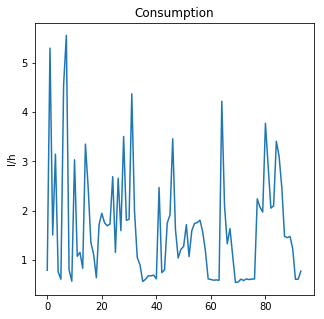

In [9]:
consumption= some_track['Consumption.value'].plot(figsize=(5,5))
consumption.set_title("Consumption") 
consumption.set_ylabel('l/h')

In [10]:
layer = pdk.Layer(
    'HexagonLayer',
    data=vis_df,
    get_position='[lng, lat]',
    auto_highlight=True,        
    elevation_scale=30,
    elevation_range=[0, 1000],
    pickable=True,
    extruded=True
)

r1 = pdk.Deck(
    width=200, 
    layers=[layer], 
    initial_view_state=view_state 
)
r1.to_html('tracks_muenster1.html', iframe_width=900)

C:\Users\visweshwar\Anaconda3\lib\site-packages\pydeck\bindings\deck.py:83: UserWarning: Mapbox API key is not set. This may impact available features of pydeck.
  UserWarning,


'C:\\Users\\visweshwar\\envirocar-py-master\\examples\\tracks_muenster1.html'